# Importing the libraries needed

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# Getting the data, splitting it into dependent and independent variables

In [10]:
data = pd.read_csv("data2.csv") 
data.drop("GDP per Capita", axis=1, inplace=True)  
X = data.iloc[:,0:-2]
y = data.iloc[:,-2]
del data

# Dummy coding the categorical variables

In [11]:
labelencoder = LabelEncoder()
X.iloc[:,0] = labelencoder.fit_transform(X.iloc[:,0]) 
onehotencoder = OneHotEncoder(categorical_features=[0]) 
X = onehotencoder.fit_transform(X).toarray()
X  = np.delete(X,[0],1)

# Normalization of the variables

In [12]:
for i in range(0,len(X[0])):
    X[:,i] = (X[:,i] - min(X[:,i])) / (max(X[:,i]) - min(X[:,i]))    
del i

# Feature selection according to their importance
# All features are selected as important, none is dropped

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y)

model = SVC(kernel="linear")
selector = RFECV(estimator=model,step=1,cv=20)
selector = selector.fit(X_train, y_train)
print(len(selector.ranking_))

27


# Gridsearch on SVM to find the optimum hyper-parameters
# Predict on test set with the hyper-parameters selected

In [14]:
SVMmodel = SVC(kernel="linear")
SVMmodel.fit(X_train,y_train)

parameters = [ {"C":list(np.logspace(-1,1,20)), "kernel":["linear"]},
               {"C":list(np.logspace(-1,1,20)), "kernel":["rbf"], "gamma":list(np.logspace(-3,1,20))} ]

search = GridSearchCV(estimator = SVMmodel, 
                      param_grid= parameters, 
                      scoring = "accuracy",
                      cv = 10)
search = search.fit(X_train,y_train)
print("The optimum C value and kernel is ", search.best_params_)
y_pred = search.predict(X_test)
print()
print(accuracy_score(y_test, y_pred))

The optimum C value and kernel is  {'C': 3.7926901907322499, 'kernel': 'linear'}

0.947368421053


# Plotting Training and Test errors - C Value

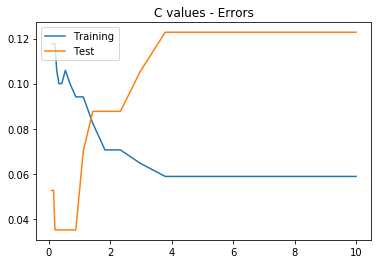

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)
Clist = np.logspace(-1,1,20)
train_errors = list()
test_errors = list()
for C in Clist:
    SVMmodel = SVC(C = C, kernel="linear", random_state = 109)
    SVMmodel.fit(X_train,y_train)
    train_errors.append(1-SVMmodel.score(X_train, y_train))
    test_errors.append(1-SVMmodel.score(X_test, y_test))    

plt.plot(Clist,train_errors) 
plt.plot(Clist,test_errors)
plt.title("C values - Errors")
plt.legend(["Training", "Test"], loc='upper left')
plt.show()